WNixalo | 20181013 | Deep Learning with PyTorch: A 60 Minute Blitz

---

## [What is PyTorch](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html)

In [3]:
import torch

In [5]:
x = torch.empty(5,3); x

tensor([[  0.0000,  -2.0000,   0.0000],
        [ -2.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000],
        [  0.0000,  -2.0000, 757.3779]])

In [6]:
x = torch.rand(5,3); x

tensor([[0.7196, 0.0489, 0.5097],
        [0.1080, 0.6150, 0.0570],
        [0.8873, 0.5836, 0.2581],
        [0.9066, 0.5226, 0.8515],
        [0.3506, 0.9919, 0.6105]])

In [7]:
x = torch.zeros(5,3, dtype=torch.long); x

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [8]:
x = torch.tensor([5.5, 3]); x

tensor([5.5000, 3.0000])

In [9]:
x = x.new_ones(5, 3, dtype=torch.double)  # new_* methods take in sizes
print(x)

x = torch.rand_like(x, dtype=torch.float) # override dtype
print(x)                                  # result has same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.8231, 0.0459, 0.8576],
        [0.0720, 0.8977, 0.0762],
        [0.1865, 0.2611, 0.3103],
        [0.6855, 0.2629, 0.1151],
        [0.0469, 0.3101, 0.6931]])


In [13]:
print(x.size())

torch.Size([5, 3])


In [21]:
y = torch.rand(5,3)
print(x + y)

tensor([[0.9861, 0.2307, 1.0246],
        [0.1107, 1.3883, 0.2155],
        [0.6517, 0.7228, 0.4054],
        [1.1826, 1.1971, 0.5678],
        [0.9271, 0.4625, 1.0260]])


In [22]:
print(torch.add(x, y))

tensor([[0.9861, 0.2307, 1.0246],
        [0.1107, 1.3883, 0.2155],
        [0.6517, 0.7228, 0.4054],
        [1.1826, 1.1971, 0.5678],
        [0.9271, 0.4625, 1.0260]])


In [23]:
result = torch.empty(5,3)
torch.add(x, y, out=result)
print(result)

tensor([[0.9861, 0.2307, 1.0246],
        [0.1107, 1.3883, 0.2155],
        [0.6517, 0.7228, 0.4054],
        [1.1826, 1.1971, 0.5678],
        [0.9271, 0.4625, 1.0260]])


In [24]:
# adds x to y
y.add_(x)
print(y)

tensor([[0.9861, 0.2307, 1.0246],
        [0.1107, 1.3883, 0.2155],
        [0.6517, 0.7228, 0.4054],
        [1.1826, 1.1971, 0.5678],
        [0.9271, 0.4625, 1.0260]])


In [25]:
print(x[:,1])

tensor([0.0459, 0.8977, 0.2611, 0.2629, 0.3101])


In [29]:
# torch.view is used to resize/reshape a tensor
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8) # the size -1  is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [30]:
# .item() is used ot get value as a Python number from a 1-element tensor
x = torch.rand(1)
print(x)
print(x.item())

tensor([0.5925])
0.5924930572509766


converting a Torch Tensor to a Numpy Array

In [31]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [32]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [33]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


converting NumPy Array to Torch Tensor

In [36]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [37]:
# let us run this cell only if CUDA is available
# We'll use ``troch.devise`` objects to move tensors in/out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")         # a CUDA device object
    y = torch.ones_like(x, device=device) # directly create a tensor on GPU
    x = x.to(device)                      # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))      # ``.to`` can also change dtype together

## [Autograd: Automatic Differentitation](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

In [38]:
import torch

In [39]:
# create a tensor and set `requires_grad=True` to track computation with it
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [40]:
# do an operation of tensor
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [41]:
# `y` was created as a result of an operation, so it ahs a `grad_fn`.
print(y.grad_fn)

In [42]:
# do more operations on y
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [49]:
# `.requires_grad_(...)` changes an existing Tensor's `requires_grad` flag 
# in-place. The input flag defaults to `False` if not given.
a = torch.randn(2, 2)
a = ((a*3) / (a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


GRADIENTS

In [50]:
# `out` contains a single scalar so `out.backward()` is eqvt to 
# `out.backward(torch.tensor(1))`
out.backward()

In [51]:
# print gradients Δ(out)/Δx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [ ]:
# out = o = 1/4 * Σ_i(z_i,z_i) = 3(x_i + 2)^2
#     and z_i|_{x_i = 1} = 27
#     ==> δo/δx_i = 3/2 (x_i + 2) ==> δo/δx_i |_{x_i=1} = 9/2 = 4.5

In [80]:
x = torch.ones(2,2, requires_grad=True)
y = x + 2
z = y*y*3
o = z.mean()

o.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [81]:
print(o)

tensor(27., grad_fn=<MeanBackward1>)


In [82]:
print(z)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)


In [83]:
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [84]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [85]:
3 * (1 + 2)**2

27

In [86]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([-1610.4822,  -167.5172,  -750.3658], grad_fn=<MulBackward0>)


In [87]:
y.data.norm()

tensor(1784.5906)

In [95]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([ 102.4000, 1024.0000,    0.1024])


In [96]:
# can also stop autograd from tracking history on Tensors with `.requires_grad=True`
# by wrapping the coe block in `with torch.no_grad()`:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


## [Neural Networks](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html)

Neural networks can be constructed using the `torch.nn` package.

`nn` depends on `autograd` to define models and differentiate them. An `nn.Module` contains layers, and a method `forward(input)` that returns the `output`.

A type training procedure for a neural network:
- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Compute the loss (how far the output is from being correct)
- Propagate gradients back into the network's parameters
- Update the weights of the network, typically using a simple update rule: `weight = weight - learning_rate * gradient`

DEFINE THE NETWORK

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions exepct the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the `forward` function, and the `backward` function (where gradients are computed) is automatically defined for you using `autograd`. You can use any Tensor operation in the `forward` function.

The learnable parameters of a model are returned by `net.parameters()`:

In [4]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight | the shape of it

10
torch.Size([6, 1, 5, 5])


Let's try a random 32x32 input. **Note**: Expected input size to this net(LeNet) is 32x32. To use this net on the MNIST dataset, resize images to 32x32.

In [21]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[ 0.0307, -0.0717,  0.0834, -0.0461,  0.0277,  0.0743,  0.0992, -0.1145,
          0.0593,  0.0151]], grad_fn=<ThAddmmBackward>)


In [23]:
# Zero the gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
out.backward(torch.randn(1,10))

<div class="alert alert-info">

**Note**:

`torch.nn` only supports mini-batches. The entire `torch.nn` package only supports inputs that are a mini-batch of samples, not a single sample.

For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples` x `nChannels` x `Height` x `Width`.

If you have a singple sample, just use `input.unsqueeze(0)` to add a fake batch dimension.

</div>

**Recap:**

* `torch.Tensor` - A *multi-dimensional array* with support for autograd operations like `backward()`. Also *holds the gradient* wrt the tensor.
* `nn.Module` - Neural network module. *Convenient way of encapsulating parameters*, with helpers for moving them to GPU, exporting, loading, etc.
* `nn.Parameter` - A kind of Tensor, that is *automatically registered as a parameter when assigned as an attribute to a `Module`*.
* `autograd.Function` - Implements *forward and backward definitions of an autograd operation*. Every `Tensor `operation creates at least a single `Function` node, that connects to functions that created a `Tensor` and *encodes its history*.

**At this point, we covered**:
* Defining a neural network
* Processing inputs and calling backward

**Still Left**:
* Computing the loss
* Updating the weights of the network

LOSS FUNCTION

A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target.

There are several different loss funcitons under the nn package. A simple one is: `nn.MSELoss` which computes the mean-squared error between the input and target.

In [25]:
output = net(input)
target = torch.randn(10) # a dummy target, for example
target = target.view(1, -1) # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.5415, grad_fn=<MseLossBackward>)


Now, if you follow `loss` in the backward direction, using its `.grad_fn` attribute, you'll seea a graph of computations that looks like this:

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call `loss.backward()`, the whole graph is differentiated wrt the loss, and all Tensors in the graph that have `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.

In [26]:
# for illustration, let's follow a few steps backward:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

BACKPROP

to backpropagate the error all we have to do is to `loss.backward()`. You need to clear the existing gradients though, else gradients will be accumulated to existing gradients.

Now we'll call `loss.backward()`, and have a look at conv1's bias gradients before and after the backward.

In [27]:
net.zero_grad()    # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0004,  0.0094,  0.0051,  0.0060, -0.0030,  0.0078])


UPDATE THE WEIGHTS

The simplest update rule used in practice is Stochastic Gradient Descent (SGD):

    weight = weight - learning_rate * gradient
    
We can implement this using simple python code:

In [ ]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different update rules such as SGD, Nesterov-SGD, Adam, RMSPropr, etc. To enable this, we built a small package: `torch.optim` that implements all these methods. Using it is very simple:

In [ ]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()    # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

<div class="alert alert-info">
    
**NOTE**: Observe how gradient buffers had to be manually set to zero using `optimizer.zero_grad()`. This is because gradients are accumulated as explained in the [Backprop](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop) section.
    
</div>

## [Training a Classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

TRAINING AN IMAGE CLASSIFIER

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using `torchvision`
2. Define a Convolutional Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range[0,1]. We transform them to Tensors of normalized range [-1,1].

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset    = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                         download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset     = torchvision.datasets.CIFAR10(root='./data', train=False, 
                                           download=True, transform=transform)
testloader  = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


truck   cat plane truck


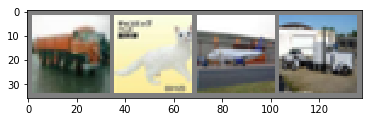

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks sectiona nd modify it to take 3-channel images (instead of 1-channel as it was defined).

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 85)
        self.fc3 = nn.Linear(85, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

4. Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

In [8]:
for epoch in range(2):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()             # zero grads
        
        # forward + backward + optimize
        outputs = net(inputs)             # run model get output
        loss = criterion(outputs, labels) # calc loss
        loss.backward()                   # backprop gradients
        optimizer.step()                  # update weights (& biases?)
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.131
[1,  4000] loss: 1.811
[1,  6000] loss: 1.670
[1,  8000] loss: 1.625
[1, 10000] loss: 1.552
[1, 12000] loss: 1.501
[2,  2000] loss: 1.446
[2,  4000] loss: 1.401
[2,  6000] loss: 1.355
[2,  8000] loss: 1.316
[2, 10000] loss: 1.287
[2, 12000] loss: 1.308
Finished Training


5. Test the network on the test data

GroundTruth:    cat  ship  ship plane


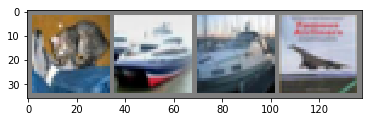

In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
outputs = net(images)

_, predicted = torch.max(outputs, 1) # get highest-confidence predictions per image

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                               for j in range(4)))

Predicted:    cat  ship  ship  ship


Looking at how the network performs on the whole dataset:

In [12]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10,000 images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10,000 images: 53 %


That's much better than chance (10%). What are the classes that performed well and those that didn't:

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze() # ¿what exactly does this do?
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
        
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 53 %
Accuracy of   car : 61 %
Accuracy of  bird : 39 %
Accuracy of   cat : 10 %
Accuracy of  deer : 63 %
Accuracy of   dog : 29 %
Accuracy of  frog : 66 %
Accuracy of horse : 64 %
Accuracy of  ship : 85 %
Accuracy of truck : 57 %


TRAINING ON GPU

Just like how you transfer a Tensor to the GPU, you transfer the neural net onto the GPU.

First define our device as the first visible cuda device if we have CUDA available:

In [15]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cpu


Assuming the device is a CUDA device:

These methods will recusrively go over all modules and convert their parameters and buffers to CUDA tensors

In [ ]:
net.to(device)

Remember that you'll ahve to send the inputs and targets at every step to the GPU too:

In [ ]:
inputs, albels = inputs.to(device), labels.to(device)

You'll see a greater speedup with GPUs on wider networks (individual layer is larger).

**Goals achieved**:
* Understanding PyTorch's Tensor library and neural networks at a high level.
* Train a small neural network to classify images.

TRAINING ON MULTIPLE GPUS:

See [Optional: Data Parallelism](https://pytorch.org/tutorials/beginner/blitz/data_parallel_tutorial.html).

*NB: I'll go through that tutorial when I have multiple GPUs.*